In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import quandl


In [0]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [0]:
warnings.filterwarnings('ignore')


In [0]:
quandl.ApiConfig.api_key = "ybN1pnD4xLUPXsWCvXXd"
df = quandl.get("WIKI/FB")

In [63]:

print(df.tail())

              Open    High     Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                                ...                                   
2018-03-21  164.80  173.40  163.30  ...    163.30      169.39  105350867.0
2018-03-22  166.13  170.27  163.72  ...    163.72      164.89   73389988.0
2018-03-23  165.44  167.10  159.02  ...    159.02      159.39   52306891.0
2018-03-26  160.82  161.10  149.02  ...    149.02      160.06  125438294.0
2018-03-27  156.31  162.85  150.75  ...    150.75      152.19   76787884.0

[5 rows x 12 columns]


In [64]:
start_date = '2012-05-18'
end_date = '2018-03-27'
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

all_weekdays=all_weekdays.values

print(all_weekdays)

['2012-05-18T00:00:00.000000000' '2012-05-21T00:00:00.000000000'
 '2012-05-22T00:00:00.000000000' ... '2018-03-23T00:00:00.000000000'
 '2018-03-26T00:00:00.000000000' '2018-03-27T00:00:00.000000000']


In [65]:

print(df.head())
print(df.shape)
print(df.columns)




             Open   High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                             ...                                   
2012-05-18  42.05  45.00  38.00  ...     38.00     38.2318  573576400.0
2012-05-21  36.53  36.66  33.00  ...     33.00     34.0300  168192700.0
2012-05-22  32.61  33.59  30.94  ...     30.94     31.0000  101786600.0
2012-05-23  31.37  32.50  31.36  ...     31.36     32.0000   73600000.0
2012-05-24  32.95  33.21  31.77  ...     31.77     33.0300   50237200.0

[5 rows x 12 columns]
(1472, 12)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


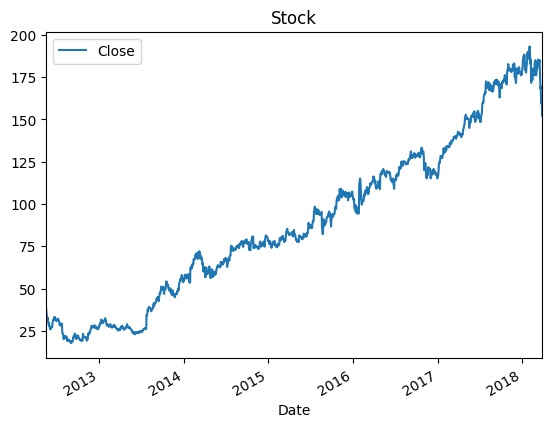

In [66]:
df[['Close']].plot()
plt.title("Stock")
plt.show()

Text(0.5, 1.0, 'Stock Cumulative Returns')

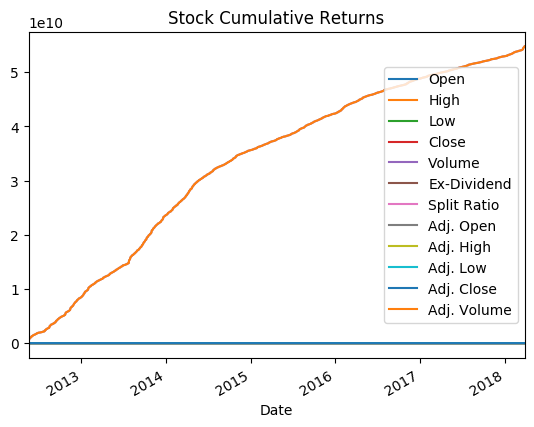

In [67]:


# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Stock Cumulative Returns')



Text(0.5, 1.0, 'Stock Autocorrelation plot')

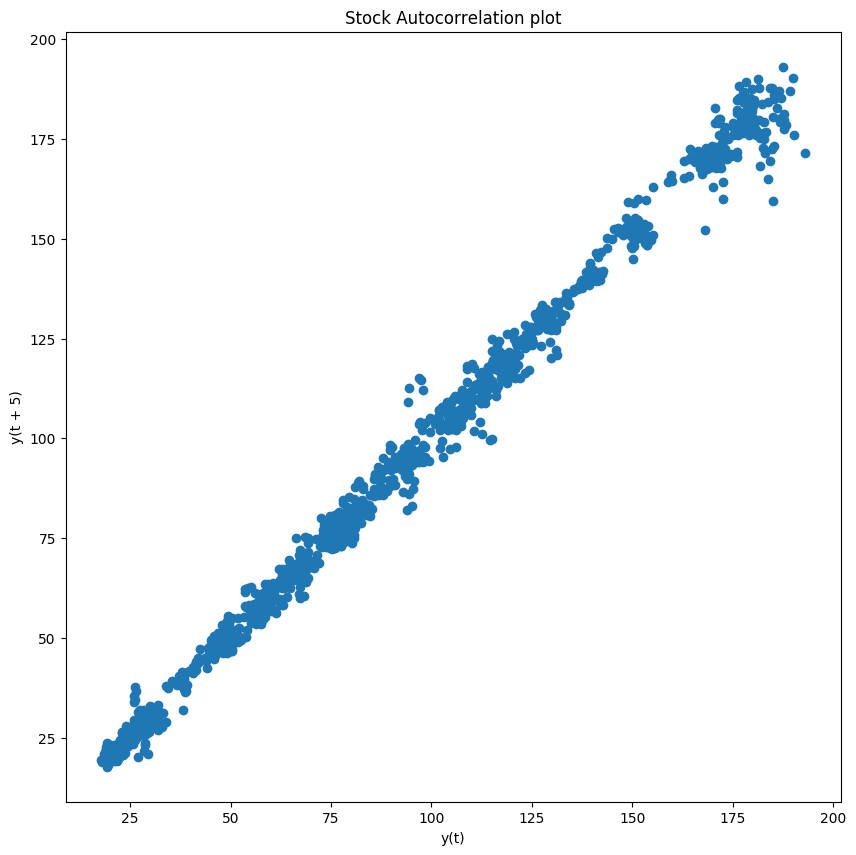

In [68]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('Stock Autocorrelation plot')

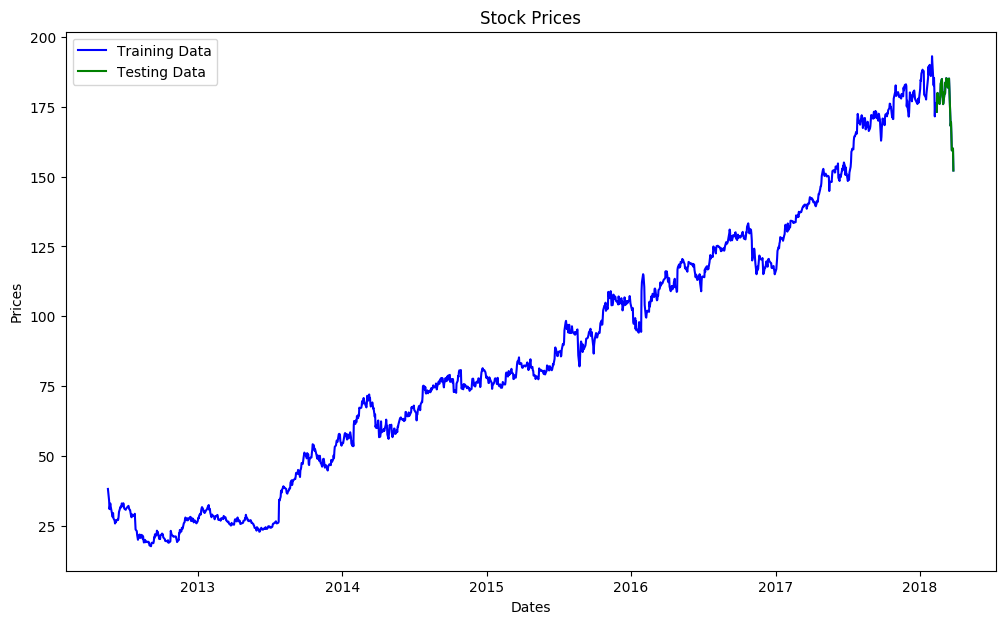

In [69]:
train_data, test_data = df[0:int(len(df)*0.98)], df[int(len(df)*0.98):]
plt.figure(figsize=(12,7))
plt.title('Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')

plt.legend()

In [0]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))



In [71]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 16.030
Symmetric mean absolute percentage error: 4.595


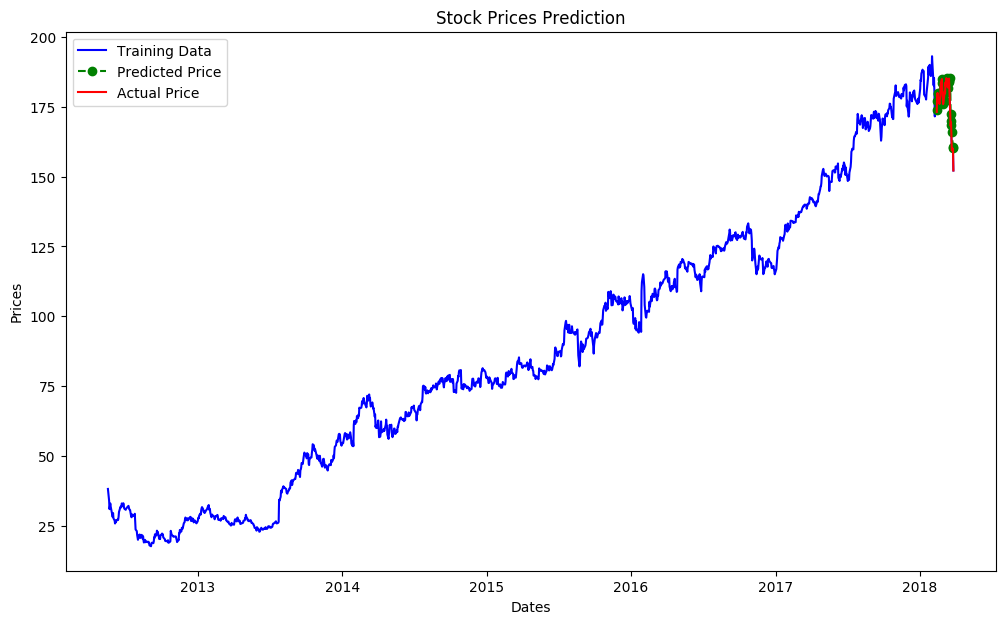

In [72]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

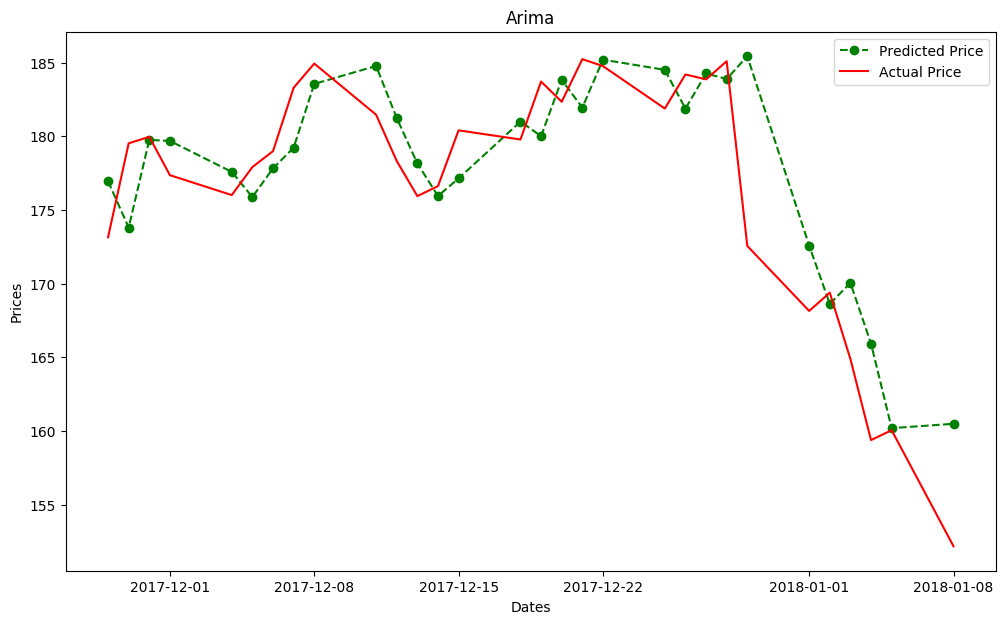

In [73]:
plt.style.use('default')
plt.figure(figsize=(12,7))

plt.plot(all_weekdays[1442:1472],predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(all_weekdays[1442:1472],test_data['Close'], color='red', label='Actual Price')
plt.title('Arima')
plt.xlabel('Dates')
plt.ylabel('Prices')

plt.legend()

In [74]:
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(test_data['Close'], predictions))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 4.00 RMSE


In [0]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score